In [165]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

import folium # map rendering library

import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [2]:
housing_toronto = pd.read_csv('props.csv', index_col=None)
housing_toronto = housing_toronto.drop(columns = 'Unnamed: 0').reset_index(drop=True)

housing_toronto = housing_toronto[housing_toronto['lat'] <= 43.75]
housing_toronto = housing_toronto[housing_toronto['lat'] >= 43.58]
housing_toronto = housing_toronto[housing_toronto['lng'] >= -79.60]
housing_toronto = housing_toronto[housing_toronto['lng'] <= -79.15]
housing_toronto = housing_toronto[housing_toronto['Address'].str.contains('Toronto')]
housing_toronto = housing_toronto[housing_toronto['Price ($)'] > 200000]
housing_toronto = housing_toronto.groupby('AreaName').mean()
housing_toronto = housing_toronto.reset_index()


In [3]:
areas_final = housing_toronto
areas_final = areas_final.reset_index(drop = True)
areas_final.head()

AreaName     Price ($)        lat        lng
0       Alderwood  1.059907e+06  43.602732 -79.544717
1  Armour Heights  3.270000e+06  43.746012 -79.428058
2  Bay Cloverhill  2.490000e+05  43.665531 -79.385147
3      Beach Hill  8.990000e+05  43.678930 -79.313476
4    Bedford Park  1.770333e+06  43.727431 -79.410515

## Groupby AreaName and Count

In [4]:
df = pd.read_csv('venues_cleaned.csv')
df.groupby(['AreaName','category']).count()

id  \
AreaName                           category                                        
Alderwood                          Beach                                       2   
                                   Breakfast Spot                              2   
                                   Burger Joint                                2   
                                   Burrito Place                               2   
                                   Café                                        2   
                                   Clothing Store                              1   
                                   Coffee Shop                                 2   
                                   College Cafeteria                           2   
                                   Convenience Store                           4   
                                   Department Store                            1   
                                   Discount Store                              6   
                                   Donut Shop                                  2   
                                   Food Truck                                  4   
                                   Gourmet Shop                                1   
                                   Grocery Store                               2   
                                   Gym                                         2   
                                   Hotel                                       1   
                                   Intersection                                1   
                                   Light Rail Station                          2   
                                   Liquor Store                                2   
                                   Market                                      2   
                                   Moroccan Restaurant                         1   
                                   Park                                       10   
                                   Performing Arts Venue                       2   
                                   Pharmacy                                    4   
                                   Pizza Place                                 4   
                                   Playground                                  4   
                                   Pool                                        2   
                                   Print Shop                                  2   
                                   Pub                                         2   
                                   Restaurant                                  1   
                                   Sandwich Place                              2   
                                   Shopping Mall                               2   
                                   Skating Rink                                2   
                                   South American Restaurant                   2   
                                   Toy / Game Store                            3   
                                   Trail                                       6   
                                   Video Game Store                            1   
Armour Heights                     Bath House                                  2   
                                   Pool                                        1   
                                   Recreation Center                           2   
                                   Ski Chalet                                  2   
                                   Wine Shop                                   1   
Bay Cloverhill                     Arts & Crafts Store                         2   
                                   Beer Bar                                    2   
                                   Bookstore                                   2   
                                   Breakfast S

In [5]:
toronto_onehot = pd.get_dummies(df[['category']], prefix="", prefix_sep="")

In [6]:
toronto_onehot['AreaName'] = df['AreaName']

In [7]:
fixed_columns = list(toronto_onehot.columns[-1:]) + list(toronto_onehot.columns[:-1])

In [8]:
toronto_onehot = toronto_onehot[fixed_columns]

In [9]:
print(toronto_onehot.shape)
toronto_onehot.head()

(21396, 405)


AreaName  Accessories Store  African Restaurant  Airport  \
0  Richview                  0                   0        0   
1  Richview                  0                   0        0   
2  Richview                  0                   0        0   
3  Richview                  0                   0        0   
4  Richview                  0                   0        0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0                    0               0             0         0       0   
1                    0               0             0         0       0   
2                    0               0             0         0       0   
3                    0               0             0         0       0   
4                    0               0             0         0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  Astrologer  \
0                    0                     0                 0           0   
1                    0                     0                 0           0   
2                    0                     0                 0           0   
3                    0                     0                 0           0   
4                    0                     0                 0           0   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  \
0                   0                0            0              0   
1                   0                0            0              0   
2                   0                0            0              0   
3                   0                0            0              0   
4                   0                0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                0          0           0           0       0     0    0   
1                0          0           0           0       0     0    0   
2                0          0           0           0       0     0    0   
3                0          0           0           0       0     1    0   
4                0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Bath House  Beach  Beach Bar  Beer Bar  Beer Store  Belgian Restaurant  \
0           0      0          0         0           0                   0   
1           0      0          0         0           0                   0   
2           0      0          0         0           0                   0   
3           0      0          0         0           0                   0   
4           0      0          0         0           0                   0   

   Big Box Store

In [10]:
toronto_grouped = toronto_onehot.groupby(['AreaName']).mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped.head()

(169, 405)


AreaName  Accessories Store  African Restaurant  Airport  \
0       Alderwood                0.0                 0.0      0.0   
1  Armour Heights                0.0                 0.0      0.0   
2  Bay Cloverhill                0.0                 0.0      0.0   
3      Beach Hill                0.0                 0.0      0.0   
4    Bedford Park                0.0                 0.0      0.0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                 0.0             0.0              0.0               0.0   
1                 0.0             0.0              0.0               0.0   
2                 0.0             0.0              0.0               0.0   
3                 0.0             0.0              0.0               0.0   
4                 0.0             0.0              0.0               0.0   

   American Restaurant  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0             0.000000             0.0           0.0       0.0     0.0   
1             0.000000             0.0           0.0       0.0     0.0   
2             0.000000             0.0           0.0       0.0     0.0   
3             0.000000             0.0           0.0       0.0     0.0   
4             0.014706             0.0           0.0       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  Astrologer  \
0                 0.00                   0.0          0.000000         0.0   
1                 0.00                   0.0          0.000000         0.0   
2                 0.02                   0.0          0.000000         0.0   
3                 0.00                   0.0          0.033333         0.0   
4                 0.00                   0.0          0.029412         0.0   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  \
0                 0.0              0.0          0.0            0.0   
1                 0.0              0.0          0.0            0.0   
2                 0.0              0.0          0.0            0.0   
3                 0.0              0.0          0.0            0.0   
4                 0.0              0.0          0.0            0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop    Bakery      Bank  \
0              0.0   0.000000    0.000000    0.000000  0.000000  0.000000   
1              0.0   0.000000    0.000000    0.000000  0.000000  0.000000   
2              0.0   0.000000    0.000000    0.000000  0.000000  0.000000   
3              0.0   0.000000    0.000000    0.000000  0.000000  0.000000   
4              0.0   0.014706    0.014706    0.014706  0.073529  0.029412   

        Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0  0.000000        0.000000               0.0               0.0   
1  0.000000        0.000000               0.0               0.0   
2  0.000000        0.000000               0.0               0.0   
3  0.033333        0.033333               0.0               0.0   
4  0.000000        0.000000               0.0               0.0   

   Basketball Stadium  Bath House     Beach  Beach Bar  Beer Bar  Beer Store  \
0                 0.0        0.00  0.021053        0.0      0.00    0.000000   
1                 0.0        0.25  0.000000        0.0      0.00    0.000000   
2                 0.0        0.00  0.000000        0.0      0.02    0.000000   
3                 0.0        0.00  0.000000        0.0      0.00    0.000000   
4                 0.0        0.00  0.000000        0.0      0.00    0.014706   

   Belgian Restaurant 

In [11]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['AreaName']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['AreaName'] = toronto_grouped['AreaName']

for ind in np.arange(toronto_grouped.shape[0]):
    row_categories = toronto_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(169, 11)


AreaName       1st Most Common Venue  \
0                             Alderwood                        Park   
1                        Armour Heights           Recreation Center   
2                        Bay Cloverhill                 Coffee Shop   
3                            Beach Hill           Indian Restaurant   
4                          Bedford Park                      Bakery   
5             Beechborough - Greenbrook        Fast Food Restaurant   
6                             Belgravia        Caribbean Restaurant   
7                               Bendale                  Playground   
8                           Birch Cliff                 Coffee Shop   
9                       Bracondale Hill                    Bus Stop   
10                           Briar Hill               Grocery Store   
11               Briar Hill - Belgravia      Furniture / Home Store   
12                          Bridle Path               Jewelry Store   
13                      Broadview North        Fast Food Restaurant   
14                     Brockton Village                         Bar   
15                           Brookhaven               Grocery Store   
16                Brookhaven - Amesbury        Fast Food Restaurant   
17                 Caledonia - Fairbank           Food & Drink Shop   
18                         Caribou Park                 Supermarket   
19                     Carleton Village                        Park   
20                      Centennial Park              Baseball Field   
21                   Central Waterfront                 Coffee Shop   
22                        Centre Island                       Beach   
23                       Chestnut Hills          Italian Restaurant   
24                 Church and Wellesley                 Coffee Shop   
25                             Clairlea                Intersection   
26                Clairlea - Birchmount              Clothing Store   
27                           Cliffcrest        Fast Food Restaurant   
28                            Cliffside                 Pizza Place   
29                         Cricket Club                 Pizza Place   
30                     Danforth Village                 Coffee Shop   
31                            Davenport                        Park   
32                           Davisville                 Coffee Shop   
33                            Don Mills                 Coffee Shop   
34                          Dorset Park            Asian Restaurant   
35                      Dovercourt Park                         Bar   
36                            Downsview       Vietnamese Restaurant   
37                             Downtown                 Coffee Shop   
38                       Dufferin Grove                         Bar   
39                           Earlscourt          Italian Restaurant   
40                        East Bayfront                 Coffee Shop   
41                        East Danforth                        Café   
42                           Eatonville                 Pizza Place   
43           Edenbridge - Humber Valley                    Pharmacy   
44                        Eglinton East                    Pharmacy   
45                        Eglinton West               Grocery Store   
46                                Emery       Vietnamese Restaurant   
47                Englemount - Lawrence                 Coffee Shop   
48               Entertainment District                 Coffee Shop   
49   Eringate - Centennial - West Deane                        Park   
50                  Etobicoke West Mall           Convenience Store   
51                             Fairbank               Grocery Store   
52                     Fashion District                 Coffee Shop   
53                   Financial District                 Coffee Shop   
54                      Flemingdon Park                        Café   
55                            Glen Park        Fast Foo

## In this Section I determine the right k-value to use using the elbowing-method.

In [12]:
toronto_grouped_clustering = toronto_grouped.drop(["AreaName"], 1)
inertia_hold = []
for i in range (1,169):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(toronto_grouped_clustering)
    inertia = kmeans.inertia_
    inertia_hold.append(inertia)

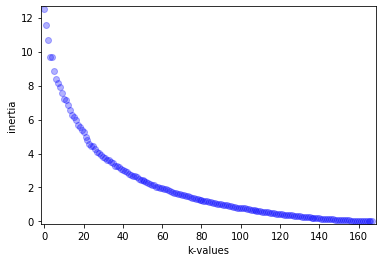

In [13]:
fig = plt.figure()
xs = range(len(inertia_hold))
ys = inertia_hold
plt.margins(x=0.01, y=0.01)
plt.scatter(xs, ys, c='b', alpha = 0.3)
plt.xlabel('k-values')
plt.ylabel('inertia')
plt.show()

## Hard to tell, but it seems to be 20 < k < 60 so let's replot it:

In [14]:
x = inertia_hold[20:60]

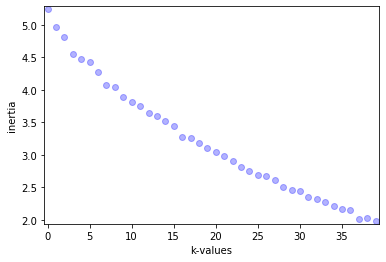

In [15]:
fig = plt.figure()
xs = range(len(x))
ys = x
plt.margins(x=0.01, y=0.01)
plt.scatter(xs, ys, c='b', alpha = 0.3)
plt.xlabel('k-values')
plt.ylabel('inertia')
plt.show()

## Assuming k=21 doesn't seem like a bad guess

In [46]:
kclusters = 15
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [47]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = neighborhoods_venues_sorted.copy()
areas_final.head()

AreaName     Price ($)        lat        lng
0       Alderwood  1.059907e+06  43.602732 -79.544717
1  Armour Heights  3.270000e+06  43.746012 -79.428058
2  Bay Cloverhill  2.490000e+05  43.665531 -79.385147
3      Beach Hill  8.990000e+05  43.678930 -79.313476
4    Bedford Park  1.770333e+06  43.727431 -79.410515

In [48]:
# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.merge(areas_final)

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(169, 15)


AreaName 1st Most Common Venue 2nd Most Common Venue  \
0       Alderwood                  Park        Discount Store   
1  Armour Heights     Recreation Center            Ski Chalet   
2  Bay Cloverhill           Coffee Shop      Sushi Restaurant   
3      Beach Hill     Indian Restaurant                  Café   
4    Bedford Park                Bakery           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Trail              Pharmacy     Convenience Store   
1            Bath House                  Pool             Wine Shop   
2          Burger Joint               Gay Bar           Yoga Studio   
3         Grocery Store                  Park           Snack Place   
4      Sushi Restaurant    Italian Restaurant        Cosmetics Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Pizza Place            Playground            Food Truck   
1           Fish Market            Donut Shop   Dumpling Restaurant   
2            Restaurant                   Gym                   Pub   
3        Shopping Plaza        Sandwich Place        Baseball Field   
4      Asian Restaurant                  Bank           Pizza Place   

         9th Most Common Venue 10th Most Common Venue  Cluster Labels  \
0             Toy / Game Store          Shopping Mall               1   
1  Eastern European Restaurant    Egyptian Restaurant               4   
2        Portuguese Restaurant       Ramen Restaurant               6   
3                          Bar                    Gym               6   
4               Sandwich Place           Burger Joint               9   

      Price ($)        lat        lng  
0  1.059907e+06  43.602732 -79.544717  
1  3.270000e+06  43.746012 -79.428058  
2  2.490000e+05  43.665531 -79.385147  
3  8.990000e+05  43.678930 -79.313476  
4  1.770333e+06  43.727431 -79.410515

In [57]:
# sort the results by Cluster Labels
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged.head()

(169, 15)


AreaName 1st Most Common Venue 2nd Most Common Venue  \
10        Briar Hill         Grocery Store              Gym Pool   
130  South Cedarbrae           Flower Shop         Grocery Store   
91       Mississauga                  Park                Bakery   
59         Guildwood         Grocery Store           Pizza Place   
103    Old East York           Coffee Shop           Pizza Place   

    3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
10      Convenience Store                   Pub                   Park   
130            Playground           Yoga Studio     Falafel Restaurant   
91           Gourmet Shop           Pizza Place  Vietnamese Restaurant   
59         Sandwich Place                  Park            Coffee Shop   
103                  Park                  Café      Convenience Store   

    6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
10            Yoga Studio           Event Space             Doner Restaurant   
130            Donut Shop   Dumpling Restaurant  Eastern European Restaurant   
91          Grocery Store           Gas Station                  Yoga Studio   
59             Sports Bar              Bus Line                        Field   
103                Bakery       Thai Restaurant               Ice Cream Shop   

    9th Most Common Venue 10th Most Common Venue  Cluster Labels  \
10             Donut Shop    Dumpling Restaurant               0   
130   Egyptian Restaurant      Electronics Store               0   
91            Event Space             Donut Shop               0   
59       Doner Restaurant             Donut Shop               0   
103        Sandwich Place         Breakfast Spot               1   

        Price ($)        lat        lng  
10   5.490000e+05  43.702183 -79.444046  
130  5.990000e+05  43.745686 -79.236183  
91   3.641875e+05  43.616276 -79.595207  
59   1.257000e+06  43.741384 -79.202923  
103  6.436020e+05  43.692837 -79.313592

In [50]:
address = 'Toronto'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster, area in zip(toronto_merged['lat'], toronto_merged['lng'], toronto_merged['Cluster Labels'], toronto_merged['AreaName']):
    label = folium.Popup('Cluster {}, {}'.format(cluster, area), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [56]:
for i in range(kclusters):
    print('Cluster # {}'.format(i))
    print(toronto_merged.loc[toronto_merged['Cluster Labels'] == i, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]])

Cluster # 0
    1st Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
10          Grocery Store                   Park           Yoga Studio   
130           Flower Shop     Falafel Restaurant            Donut Shop   
91                   Park  Vietnamese Restaurant         Grocery Store   
59          Grocery Store            Coffee Shop            Sports Bar   

    7th Most Common Venue        8th Most Common Venue 9th Most Common Venue  \
10            Event Space             Doner Restaurant            Donut Shop   
130   Dumpling Restaurant  Eastern European Restaurant   Egyptian Restaurant   
91            Gas Station                  Yoga Studio           Event Space   
59               Bus Line                        Field      Doner Restaurant   

    10th Most Common Venue  Cluster Labels  Price ($)        lat        lng  
10     Dumpling Restaurant               0   549000.0  43.702183 -79.444046  
130      Electronics Store               0   599000.0  43.74

## Modelling

In [78]:
toronto_grouped['price'] = areas_final['Price ($)']

In [95]:
toronto_grouped.shape

(169, 406)

In [164]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = toronto_grouped.drop(columns = 'AreaName')
feature_cols = data.columns
X = data.loc[:, feature_cols]
y = data.iloc[:,-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Columns: 405 entries, Accessories Store to price
dtypes: float64(405)
memory usage: 534.9 KB


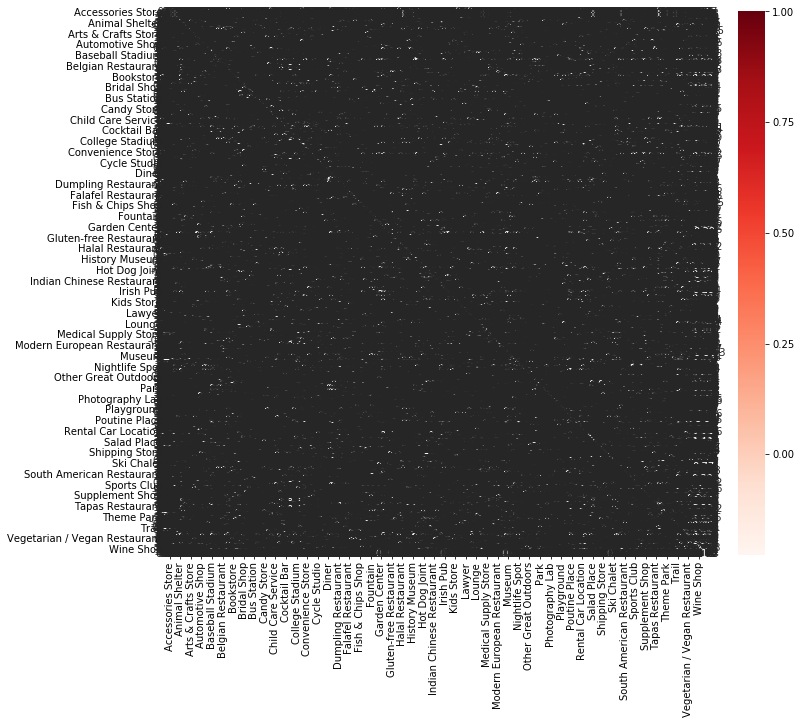

In [166]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [190]:
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.dtype

dtype('float64')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

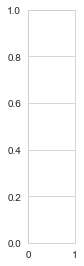

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #

ValueError: Unknown label type: (array([ 829000.        ,  483952.23      ,  726780.        ,
        634892.85714286,  668400.        , 1621300.        ,
       1035046.15384615,  539900.        ,  309400.        ,
        825450.        ,  506175.        , 1770333.33333333,
       1049950.        ,  594000.        ,  750969.9       ,
        416500.        ,  829199.29411765,  549000.        ,
        624000.        , 1597250.        , 1059907.07142857,
        811694.95      ,  765191.14285714,  521294.11111111,
        476175.        ,  643659.6       ,  567175.        ,
       2785000.        , 1079220.        ,  885328.57142857,
       2749900.        ,  903250.        ,  445600.        ,
       2261576.81818182, 1105865.88888889,  690394.0952381 ,
       1145666.66666667,  976288.88888889, 1282666.66666667,
       1124500.        ,  279900.        ,  841499.9       ,
        613452.85714286,  586584.        ,  551425.        ,
        814594.23809524,  825432.28571429,  981961.        ,
       3498950.        , 1080046.15384615, 4768648.        ,
       2290250.        ,  699900.        ,  902950.        ,
        699000.        ,  757633.33333333,  899000.        ,
        574333.33333333,  504584.85714286, 1065199.6       ,
       1009677.31818182,  382012.57142857,  523233.33333333,
        531414.28571429,  716040.        , 3627822.22222222,
        536704.5       ,  888038.0952381 ,  306633.33333333,
        364187.5       ,  478431.25      ,  699674.35      ,
       1002738.46153846, 1523448.42007435, 1002152.63157895,
        569452.75      , 2195966.66666667,  949000.        ,
       1257000.        ,  817380.80952381,  599000.        ,
        574876.19047619, 2537500.        , 1506322.22222222,
        682333.33333333, 2717857.14285714,  731742.30769231,
        280940.        , 2795000.        ,  436963.63636364,
       1589000.        ,  649000.        ,  539352.94117647,
        662499.5       ,  904200.        ,  512450.        ,
        916087.5       ,  384900.        ,  632441.80312907,
       4737110.        , 3270000.        ,  549963.33333333,
       1269360.46153846,  599000.        ,  574660.        ,
        643602.04166667, 2095135.        ,  607302.97014925,
        824933.33333333,  541607.33333333, 2144700.        ,
        951000.        ,  629500.        ,  709000.        ,
        898000.        , 1198116.66666667,  478420.33333333,
       1104000.        ]),)